# Import Packages

In [1]:
import matplotlib.pyplot as plt
from utils import create_dataset,model_plot,history_plot, read_data, plot_data, prepare_train_test_data
import numpy as np
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_absolute_error as mae

In [2]:
clean_df, data = read_data('../../datasets/yt_subscribers.csv', debug=True)

         Date  Subscribers  Unnamed: 2  Unnamed: 3  Unnamed: 4
0   8/26/2024           40         NaN         NaN         NaN
1  10/13/2024           39         NaN         NaN         NaN
2   3/28/2024           38         NaN         NaN         NaN
3   8/25/2024           38         NaN         NaN         NaN
4   7/18/2024           37         NaN         NaN         NaN
5   9/16/2024           36         NaN         NaN         NaN
6   8/10/2024           34         NaN         NaN         NaN
7   7/26/2024           33         NaN         NaN         NaN
8    9/1/2024           33         NaN         NaN         NaN
9   11/4/2024           33         NaN         NaN         NaN
----------------------------------------------------
          Date  Subscribers
254 2023-11-15           13
336 2023-11-16            8
349 2023-11-17            6
301 2023-11-18           10
215 2023-11-19           15
180 2023-11-20           17
361 2023-11-21            3
337 2023-11-22            8
35

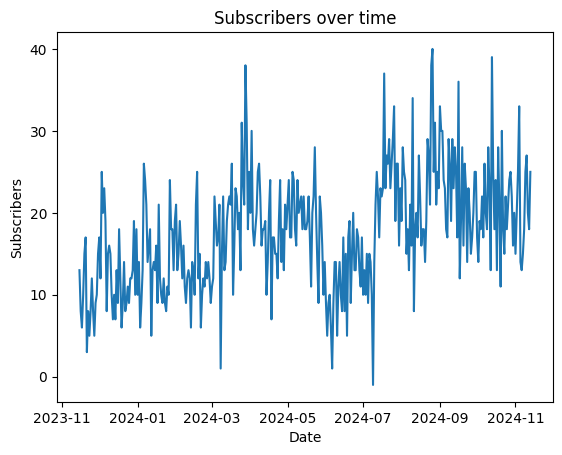

In [3]:
plot_data(clean_df["Subscribers"], title="Subscribers over time", x_label="Date", y_label="Subscribers")

In [4]:
x_train, x_test, y_train, y_test, scaler = prepare_train_test_data(data, time_step_in=30, time_step_out=30, test_size=0.2)

x_train shape: (244, 30), y_train shape: (244, 30), x_test shape: (61, 30), y_test shape: (61, 30)


## definition model

In [5]:
lstm_model=Sequential()
lstm_model.add(LSTM(50,return_sequences=True,input_shape=(30,1)))
lstm_model.add(LSTM(50,return_sequences=True))
lstm_model.add(LSTM(50))
lstm_model.add(Dense(30))
lstm_model.compile(loss='mean_absolute_error', optimizer=Adam(learning_rate=0.03), metrics=['mean_absolute_error'])
lstm_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 30)             │         1,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,330 (204.41 KB)

 Trainable params: 52,330 (204.41 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history=lstm_model.fit(
    x_train,y_train,
    epochs=100,
    validation_data=(x_test,y_test),
    verbose=1,
)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.4047 - mean_absolute_error: 0.4047 - val_loss: 0.1787 - val_mean_absolute_error: 0.1787
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1608 - mean_absolute_error: 0.1608 - val_loss: 0.1380 - val_mean_absolute_error: 0.1380
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1405 - mean_absolute_error: 0.1405 - val_loss: 0.1357 - val_mean_absolute_error: 0.1357
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1386 - mean_absolute_error: 0.1386 - val_loss: 0.1347 - val_mean_absolute_error: 0.1347
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1381 - mean_absolute_error: 0.1381 - val_loss: 0.1333 - val_mean_absolute_error: 0.1333
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1357 - mean_absolute_error: 0.1357 - val_loss: 0.1347 - val_mean_absolute_error: 0.1347
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1381 - mean_absolute_error: 0.1381 - val_loss: 0.132

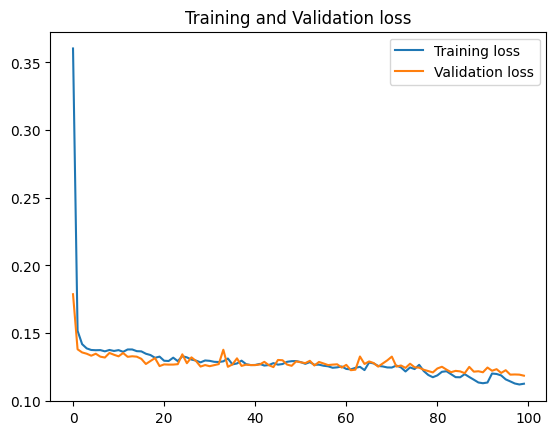

In [7]:
history_plot(history)

In [8]:
train_predicted=lstm_model.predict(x_train)
test_predicted=lstm_model.predict(x_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [9]:
mae_error_train= mae(y_train,train_predicted)
mae_error_test= mae(y_test,test_predicted)
print(f"MAE Train data  : {mae_error_train} ")
print(f"MAE  Test data : {mae_error_test} ")

MAE Train data  : 0.1103617317901735 
MAE  Test data : 0.11848064273293421 


In [10]:
x_test=scaler.inverse_transform(x_test)
x_train=scaler.inverse_transform(x_train)

In [11]:
y_next_30=lstm_model.predict(x_test[-1].reshape(1,-1))
y_next_30=scaler.inverse_transform(y_next_30)
y_next_30=np.round(y_next_30,0)
print(f"X-Test actual : {x_test[-1]}\nX-Test predict : {y_next_30}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
X-Test actual : [ 9. 11. 12. 22. 19. 16. 17. 21.  1. 15. 22. 13. 14. 19. 21. 22. 21. 26.
 10. 16. 23. 22. 18. 20. 13. 31. 24. 21. 38. 31.]
X-Test predict : [[28. 25. 26. 24. 25. 22. 24. 23. 20. 21. 21. 22. 21. 19. 21. 18. 20. 21.
  19. 21. 19. 17. 20. 20. 20. 21. 22. 22. 22. 23.]]


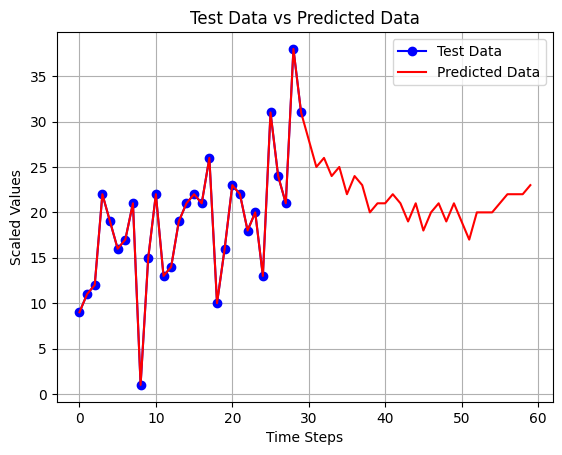

In [12]:
plt.plot(x_test[-1], label='Test Data', color='blue', marker='o')
plt.plot(np.hstack([x_test[-1], y_next_30.reshape(-1)]), label='Predicted Data', color='red')
plt.title('Test Data vs Predicted Data')
plt.xlabel('Time Steps')
plt.ylabel('Scaled Values')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
last_date = clean_df.index[-1]
total_sub=np.sum(clean_df["Subscribers"])
total_next_30=np.sum(y_next_30)
total_next_30=np.round(total_next_30)
print(f"Total subscribers till {last_date}: {total_sub}, next_30_days: {total_next_30} => final after 30 days: {total_sub + total_next_30}")

Total subscribers till 2024-11-13 00:00:00: 6383, next_30_days: 647.0 => final after 30 days: 7030.0
